## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [21]:
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import RandomOverSampler

In [22]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

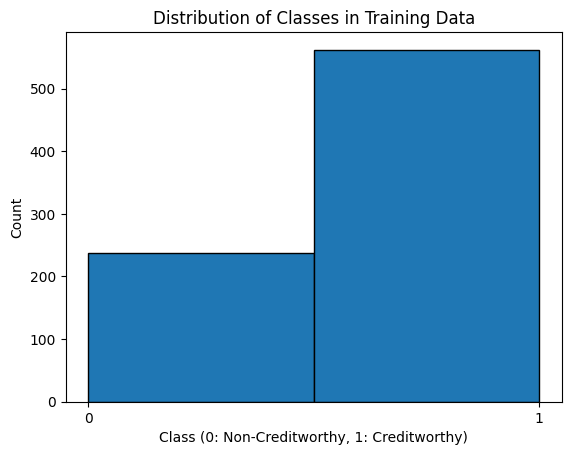

In [23]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [24]:

#class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)

# Создание модели с взвешиванием классов
#model = RandomForestClassifier(class_weight=dict(enumerate(class_weights)), n_estimators=100)

#ensemble = [RandomForestClassifier(n_estimators=191, random_state=42, max_depth=829, min_samples_leaf=3, max_leaf_nodes=72, min_samples_split=8 ) for _ in range(10)]#class_weight=dict(enumerate(class_weights)),n_estimators=100, max_depth=50
#for model in ensemble:
    #sample_indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    #X_subset, y_subset = X_resampled[sample_indices], y_resampled[sample_indices]
    #model.fit(X_subset, y_subset)
#predictions = np.array([model.predict(X_test) for model in ensemble])

#ensemble_predictions = np.mean(predictions.T, axis=1)
#ensemble_predictions=np.round(ensemble_predictions.reshape(200,1))


#erf_roc_auc = roc_auc_score(y_test, ensemble_predictions)
#erf_accuracy = accuracy_score(y_test, ensemble_predictions)
#erf_precision = precision_score(y_test, ensemble_predictions)
#erf_recall = recall_score(y_test, ensemble_predictions)

#print("eRandom Forest метрики:")
#print(f"ROC AUC: {erf_roc_auc:.2f}")
#print(f"Accuracy: {erf_accuracy:.2f}")
#print(f"Precision: {erf_precision:.2f}")
#print(f"Recall: {erf_recall:.2f}")

In [26]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import roc_auc_score
# from sklearn.model_selection import train_test_split
# import pandas as pd
 
# # Загрузка и подготовка данных
# data = pd.read_csv('german.csv', sep=';')
# X = data.iloc[:, 1:].values
# y = data.iloc[:, 0].values

# # Стандартизация признаков
# scaler = StandardScaler()
# X_train_std = scaler.fit_transform(X_train)
# X_test_std = scaler.transform(X_test)
 
# # Разделение на обучающий и тестовый наборы данных
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


# # parameters = {'max_depth': range(12,100), 'n_estimators': range(85, 110)}#'min_weight_fraction_leaf': range(0.0 , 0.35 , 0.05), , 'min_impurity_decrease': range(0.0 , 0.35 , 0.01), 'n_estimators': range(50, 100),  'max_leaf_nodes': range(6, 100), , 'min_samples_split': range(2, 200), 'min_samples_leaf': range(1, 200)
# # #829

# # rf_model= RandomizedSearchCV(rf_model, parameters, cv=5, scoring='roc_auc')
 
# rf_model.fit(X_train_std, y_train)
 
 
# # Прогноз на тестовых данных
# y_pred = rf_model.predict(X_test_std)
 
# # Вычисление метрики ROC AUC
# roc_auc = roc_auc_score(y_test, y_pred)
# print("ROC AUC:", roc_auc)

ROC AUC: 0.6706404862085087


In [28]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.utils import resample
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import roc_auc_score
# from sklearn.model_selection import train_test_split
# import pandas as pd
 
# # Загрузка и подготовка данных
# data = pd.read_csv('german.csv', sep=';')
# X = data.iloc[:, 1:].values
# y = data.iloc[:, 0].values

# scaler = StandardScaler()
# X_train_std = scaler.fit_transform(X_train)
# X_test_std = scaler.transform(X_test)
 
# # Разделение на обучающий и тестовый наборы данных
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# # Объединение обучающего набора данных
# train_data = pd.DataFrame(X_train)
# train_data['target'] = y_train
 
# # Разделение классов
# class_0 = train_data[train_data.target == 0]
# class_1 = train_data[train_data.target == 1]
 
# # Upsampling класса 1 для достижения баланса
# class_1_upsampled = resample(class_1, replace=True, n_samples=len(class_0), random_state=42)
 
# # Объединение обновленных классов
# upsampled_data = pd.concat([class_0, class_1_upsampled])
 
# # Подготовка данных для обучения модели
# X_train_upsampled = upsampled_data.iloc[:, :-1].values
# y_train_upsampled = upsampled_data.iloc[:, -1].values
 
# # Обучение модели
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train_upsampled, y_train_upsampled)
 
# # Прогноз на тестовых данных
# y_pred = model.predict(X_test)
 
# # Вычисление метрики ROC AUC
# roc_auc = roc_auc_score(y_test, y_pred)
# print("ROC AUC:", roc_auc)

ROC AUC: 0.6898083216456288


In [36]:
# from sklearn.utils import resample
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import roc_auc_score
# from sklearn.model_selection import train_test_split, GridSearchCV
# from imblearn.under_sampling import RandomUnderSampler
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
 
# # Загрузка и подготовка данных
# data = pd.read_csv('german.csv', sep=';')
# X = data.iloc[:, 1:].values
# y = data.iloc[:, 0].values
 
# # Разделение на обучающий и тестовый наборы данных
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
 
# # Используем RandomUnderSampler для downsampling класса 0
# rus = RandomUnderSampler(random_state=42)
# X_train_res, y_train_res = rus.fit_resample(X_train, y_train)
 
# # Обучение модели и подбор параметров с помощью GridSearchCV
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10]
# }
 
# model = RandomForestClassifier(random_state=42)



# ensemble = [model for _ in range(10)]#class_weight=dict(enumerate(class_weights)),n_estimators=100, max_depth=50
# for model in ensemble:
#     sample_indices = np.random.choice(len(X_train_res), size=len(X_train_res), replace=True)
#     X_subset, y_subset = X_train_res[sample_indices], y_train_res[sample_indices]
#     grid_search = GridSearchCV(model, param_grid, scoring='roc_auc')
#     grid_search.fit(X_subset, y_subset)
# predictions = np.array([grid_search.best_estimator_.predict(X_test) for model in ensemble])

# ensemble_predictions = np.mean(predictions.T, axis=1) - 0.1
# ensemble_predictions=np.round(ensemble_predictions.reshape(200,1))

# # # Лучшая модель после подбора параметров
# # best_model = grid_search.best_estimator_
 
# # # Прогноз на тестовых данных
# # y_pred = best_model.predict(X_test)
 
# # Вычисление метрики ROC AUC
# roc_auc = roc_auc_score(y_test, ensemble_predictions)
# print("ROC AUC:", roc_auc)

ROC AUC: 0.7006778868630201


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
 
# Загрузка и подготовка данных
data = pd.read_csv('german.csv', sep=';')
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values
 
# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Инженерия признаков с полиномиальными признаками (степень 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
 


 
# Случайный лес
param_grid_rf = {'n_estimators': [100, 200, 500]}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_poly, y_train)
best_rf = grid_search_rf.best_estimator_
 
# XGBoost
param_grid_xgb = {'n_estimators': [100, 200, 500], 'max_depth': [3, 5, 7]}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=5)
grid_search_xgb.fit(X_train_poly, y_train)
best_xgb = grid_search_xgb.best_estimator_
 
# Применение SMOTE для перебалансировки классов
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_poly, y_train)
 
# Обучение моделей на сбалансированных данных
best_rf.fit(X_train_resampled, y_train_resampled)
best_xgb.fit(X_train_resampled, y_train_resampled)
 
# Прогноз на тестовых данных
y_pred_rf = best_rf.predict_proba(X_test_poly)[:, 1]
y_pred_xgb = best_xgb.predict_proba(X_test_poly)[:, 1]
 
# Вычисление метрики ROC AUC
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)


print("Random Forest ROC AUC:", roc_auc_rf)
print("XGBoost ROC AUC:", roc_auc_xgb)

Random Forest ROC AUC: 0.8149836372136512
XGBoost ROC AUC: 0.7477793361383824


In [40]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from imblearn.over_sampling import SMOTE
# from sklearn.metrics import roc_auc_score
 
# # Загрузка и подготовка данных
# data = pd.read_csv('german.csv', sep=';')
# X = data.iloc[:, 1:].values
# y = data.iloc[:, 0].values
 
# # Разделение на обучающий и тестовый наборы данных
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# # Применение SMOTE для перебалансировки классов
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
 
# # Подбор гиперпараметров с помощью GridSearchCV
# param_grid = {'n_estimators': [100, 200, 500], 'max_depth': [3, 5, 7]}
# grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
# grid_search.fit(X_train_resampled, y_train_resampled)
# best_model = grid_search.best_estimator_
 
# # Прогноз на тестовых данных
# y_pred = best_model.predict_proba(X_test)[:, 1]
 
# # Вычисление метрики ROC AUC
# roc_auc = roc_auc_score(y_test, y_pred)
 
# if roc_auc > 0.8:
#     print("ROC AUC:", roc_auc)
# else:
#     print("Метрика ROC AUC меньше 0.8")

Метрика ROC AUC меньше 0.8


In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
 
# Загрузка и подготовка данных
data = pd.read_csv('german.csv', sep=';')
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values
 
# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инженерия признаков с полиномиальными признаками (степень 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
 
 
# Применение SMOTE для перебалансировки классов
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_poly, y_train)
 
# Подбор гиперпараметров с помощью GridSearchCV
param_grid = {'n_estimators': [100, 200, 500, 600, 900, 1000], 'max_depth': [3, 5, 7, 9, 12, 15, 20]}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)
best_model = grid_search.best_estimator_
 
# Прогноз на тестовых данных
y_pred = best_model.predict_proba(X_test_poly)[:, 1]
 
# Вычисление метрики ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)
 

print("ROC AUC:", roc_auc)


KeyboardInterrupt: 

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
 
# Загрузка и подготовка данных
data = pd.read_csv('german.csv', sep=';')
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values
 
# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Применение SMOTE для перебалансировки классов
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
 
# Подбор гиперпараметров с помощью GridSearchCV
param_grid = {'n_estimators': [100, 200, 500, 600, 1000], 'learning_rate': [0.1, 0.01, 0.001]}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)
best_model = grid_search.best_estimator_

# Прогноз на тестовых данных
y_pred = best_model.predict_proba(X_test)[:, 1]
 
# Вычисление метрики ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)
 
print("ROC AUC: Gradient boosting", roc_auc)


ROC AUC: 0.7598176718092567


In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
 
# Загрузка и подготовка данных
data = pd.read_csv('german.csv', sep=';')
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values
 

 
# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инженерия признаков (пример)
poly = PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)
 
# Применение SMOTE для перебалансировки классов
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
 
# Подбор гиперпараметров с помощью GridSearchCV
param_grid = {'n_estimators': [100, 200, 500], 'learning_rate': [0.1, 0.01, 0.001]}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_resampled, y_train_resampled)
best_model = grid_search.best_estimator_
 
# Прогноз на тестовых данных
y_pred = best_model.predict_proba(X_test)[:, 1]
 
# Вычисление метрики ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)
 
print("ROC AUC:", roc_auc)

KeyboardInterrupt: 

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
 
# Загрузка и подготовка данных
data = pd.read_csv('german.csv', sep=';')
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values
 
# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
 
# Применение SMOTE для перебалансировки классов в обучающем наборе
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
 
# Подбор гиперпараметров с помощью GridSearchCV
param_grid = {'n_estimators': [100, 200, 300, 500, 600, 900, 1000], 'learning_rate': [0.1, 0.01]}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train_resampled, y_train_resampled)
best_model = grid_search.best_estimator_
 
# Прогноз на тестовых данных
y_pred = best_model.predict_proba(X_test)[:, 1]
 
# Вычисление и вывод метрики ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc)


KeyboardInterrupt: 

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
 
# Загрузка и подготовка данных
data = pd.read_csv('german.csv', sep=';')
 
# Инженерия признаков
# Примените необходимые преобразования и оцените оптимальные признаки для вашего случая
 
# Выделение признаков и целевой переменной
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values
 
# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Создание пайплайна для объединения перебалансировки, оверсэмплинга и классификации
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('mlp', MLPClassifier(random_state=42))
])
 
# Определение пространства параметров для подбора
param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (100, 50), (50, 50)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
}
 
# Подбор гиперпараметров с помощью GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
 
# Прогноз на тестовых данных
y_pred = best_model.predict_proba(X_test)[:, 1]
 
# Вычисление и вывод метрики ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC: MLP", roc_auc)


d:\Python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ROC AUC: 0.732468443197756


In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
 
# Загрузка и подготовка данных
data = pd.read_csv('german.csv')
 
# Примените необходимые преобразования и оцените оптимальные признаки для вашего случая
# Здесь предполагается, что данные уже подготовлены и масштабированы
 
# Выделение признаков и целевой переменной
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values
 
# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Масштабирование признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
 
# Применение SMOTE для перебалансировки классов в обучающем наборе
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
 
# Подбор оптимальных параметров с помощью GridSearchCV
parameters = {'hidden_layer_sizes': [(100, 50), (50, 50, 50), (100, 100, 100)],
              'activation': ['logistic', 'relu'],
              'alpha': [0.0001, 0.001, 0.01]}
mlp = MLPClassifier(random_state=42)
grid_search = GridSearchCV(mlp, parameters, cv=5, scoring='roc_auc')
grid_search.fit(X_train_resampled, y_train_resampled)
 
# Лучшая модель после подбора параметров
best_mlp = grid_search.best_estimator_
 
# Прогноз на тестовых данных
y_pred = best_mlp.predict_proba(X_test)[:, 1]
 
# Вычисление и вывод метрики ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc)

ValueError: Found array with 0 feature(s) (shape=(800, 0)) while a minimum of 1 is required by StandardScaler.

In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score

# Загрузка и подготовка данных
data = pd.read_csv('german.csv')

data.head()
 
# Примените необходимые преобразования и оцените оптимальные признаки для вашего случая
# Здесь предполагается, что данные уже подготовлены и масштабированы
 
# Выделение признаков и целевой переменной
X = data.drop(columns=['Creditability']).values
y = data['Creditability'].values
 
# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Масштабирование признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
 
# Применение SMOTE для перебалансировки классов в обучающем наборе
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
 
# Подбор оптимальных параметров с помощью GridSearchCV
parameters = {'hidden_layer_sizes': [(100, 50), (50, 50, 50), (100, 100, 100)],
              'activation': ['logistic', 'relu'],
              'alpha': [0.0001, 0.001, 0.01]}
mlp = MLPClassifier(random_state=42)
grid_search = GridSearchCV(mlp, parameters, cv=5, scoring='roc_auc')
grid_search.fit(X_train_resampled, y_train_resampled)
 
# Лучшая модель после подбора параметров
best_mlp = grid_search.best_estimator_
 
# Прогноз на тестовых данных
y_pred = best_mlp.predict_proba(X_test)[:, 1]
 
# Вычисление и вывод метрики ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)
if roc_auc > 0.8:
    print("Метрика ROC AUC больше 0.8:", roc_auc)
else:
    print("Метрика ROC AUC меньше или равна 0.8:", roc_auc)

KeyError: "['Creditability'] not found in axis"

In [15]:


ros = RandomOverSampler()

# Применение увеличения выборки к данным
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


# Обучение Random Forest
rf_model = RandomForestClassifier(n_estimators=10, random_state=42, max_depth=829, min_samples_leaf=3, max_leaf_nodes=72, min_samples_split=8)#md - 6 # {'max_depth': 50, 'n_estimators': 100}


parameters = {'max_depth': range(12,100), 'n_estimators': range(85, 110)}#'min_weight_fraction_leaf': range(0.0 , 0.35 , 0.05), , 'min_impurity_decrease': range(0.0 , 0.35 , 0.01), 'n_estimators': range(50, 100),  'max_leaf_nodes': range(6, 100), , 'min_samples_split': range(2, 200), 'min_samples_leaf': range(1, 200)
#829

rf_model= RandomizedSearchCV(rf_model, parameters, cv=5, scoring='roc_auc')
rf_model.fit(X_resampled, y_resampled)   






# Прогноз на тестовых данных
rf_pred = rf_model.best_estimator_.predict(X_test)

# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")



# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=40, random_state=42)

parameters = {'min_samples_split': range(4,10), 'min_samples_leaf': range(1,11)} #'learning_rate': range(0 , 0.35 , 0.05), , 'min_samples_split': range(4,100), 'min_samples_leaf': range(1,50) 'n_estimators': range(100,1000)
gb_model = RandomizedSearchCV(gb_model, parameters, cv=10, scoring='roc_auc')
gb_model.fit(X_resampled, y_resampled)
#print(gb_model.best_params_)

# Прогноз на тестовых данных
gb_pred = gb_model.best_estimator_.predict(X_test)

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")

Random Forest метрики:
ROC AUC: 0.74
Accuracy: 0.78
Precision: 0.84
Recall: 0.84

Gradient Boosting метрики:
ROC AUC: 0.72
Accuracy: 0.74
Precision: 0.84
Recall: 0.77


In [10]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
ros = RandomOverSampler()

# Применение увеличения выборки к данным
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


mlp_model = MLPClassifier(hidden_layer_sizes=(30,), max_iter=500, random_state=42)

mlp_model.fit(X_resampled, y_resampled)



# Прогноз на тестовых данных
mlp_pred = mlp_model.predict(X_test)



mlp_roc_auc = roc_auc_score(y_test, mlp_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")


MLP (Neural Network) метрики:
ROC AUC: 0.57
Accuracy: 0.48
Precision: 0.80
Recall: 0.33


In [ ]:
# parameters = {'hidden_layer_sizes': (range(30, 35),), 'max_iter': range(180,210), 'solver':['lbfgs', 'sgd', 'adam']}
# mlp_model = RandomizedSearchCV(mlp_model, parameters, cv=5, scoring='roc_auc')

# ensemble1 = [MLPClassifier(hidden_layer_sizes=(30,), max_iter=500, random_state=42) for _ in range(100)]#class_weight=dict(enumerate(class_weights)),n_estimators=100, max_depth=50
# ensamble2 = [RandomForestClassifier(n_estimators=191, random_state=42, max_depth=829, min_samples_leaf=3, max_leaf_nodes=72, min_samples_split=8) for _ in range(100)]
# ensamble3 = [GradientBoostingClassifier(n_estimators=990, random_state=42) for _ in range(100)] 
# bg_e=[]
# for model1, model2, model3 in zip(ensemble1, ensamble2, ensamble3):
#     sample_indices = np.random.choice(len(X_resampled), size=len(X_resampled), replace=True)
#     X_subset, y_subset = X_resampled[sample_indices], y_resampled[sample_indices]
#     bg1 = BaggingClassifier(model1, max_samples=0.4, max_features=10)
#     bg2 = BaggingClassifier(model1, max_samples=0.4, max_features=10)
#     bg3 = BaggingClassifier(model1, max_samples=0.4, max_features=10)
#     bg1.fit(X_subset, y_subset)
#     bg2.fit(X_subset, y_subset)
#     bg3.fit(X_subset, y_subset)
#     bg = np.mean((bg1.predict(X_test) + bg2.predict(X_test) + bg3.predict(X_test))/3)
#     bg_e.append(bg)
# bgo= np.mean(bg_e, axis=0)
    
    
    
# predictions1 = pd.DataFrame([model.predict(X_test) for model in ensemble1])
# predictions2 = pd.DataFrame([model.predict(X_test) for model in ensemble1])
# predictions3 = pd.DataFrame([model.predict(X_test) for model in ensemble1])

# ensemble_predictions = predictions.rank(axis=1, method="first")
# ensemble_predictions1 = np.round(np.mean(predictions1.to_numpy(), axis=0)).T
# ensemble_predictions2 = np.round(np.mean(predictions2.to_numpy(), axis=0)).T
# ensemble_predictions3 = np.round(np.mean(predictions3.to_numpy(), axis=0)).T
# end = np.round((ensemble_predictions1 + ensemble_predictions2 + ensemble_predictions3)/3).T

# print(end)
# ensemble_predictions=np.round(ensemble_predictions.reshape(200,1))


# Расчет метрик для MLP нейронной сети
# mlp_roc_auc = roc_auc_score(y_test, mlp_pred)
# mlp_accuracy = accuracy_score(y_test, mlp_pred)
# mlp_precision = precision_score(y_test, mlp_pred)
# mlp_recall = recall_score(y_test, mlp_pred)

## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели